In [1]:
import sklearn.neighbors as neigh
import pandas as pd # packages needed 

Imports data to be used

In [2]:
df = pd.read_csv("https://github.com/ianmcloughlin/datasets/raw/master/iris.csv")

In [18]:
#df
# displays data remove # to display

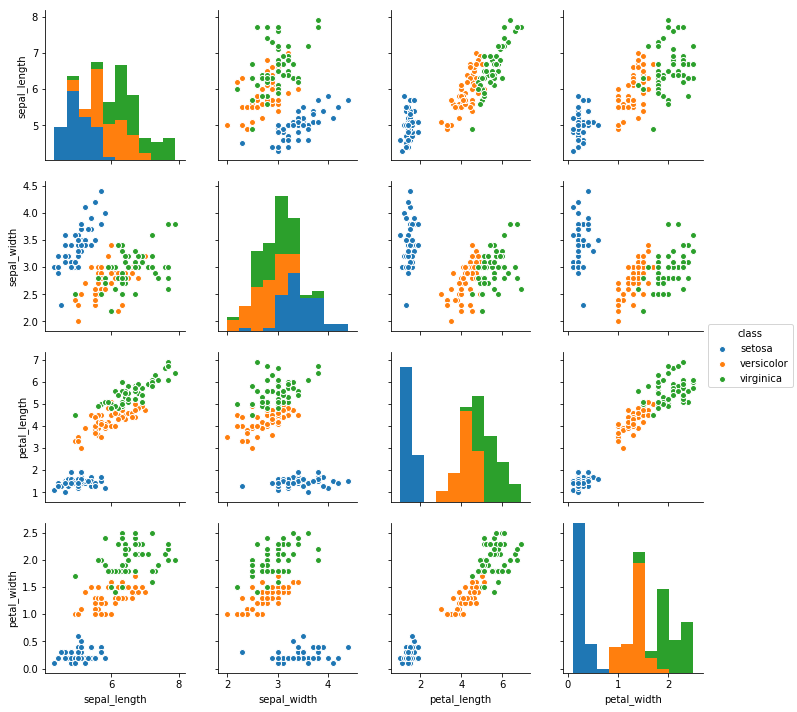

In [19]:
import seaborn as sns
sns.pairplot(df, hue="class")
# displays data in graphs

Seperates data frame into inputs and outputs

In [5]:
inputs = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
outputs = df['class']

In [6]:
#inputs# prints to screen   remove first # to print to screen

In [7]:
#outputs# prints to screen  remove first # to print to screen

In [8]:
knn = neigh.KNeighborsClassifier(n_neighbors=5)

In [9]:
knn.fit(inputs, outputs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
df.loc[0]# runs first iris in list

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
class           setosa
Name: 0, dtype: object

In [16]:
knn.predict([[5.1, 3.5, 1.4, 0.2]])
# predicts what class the inputed data falls into

array(['setosa'], dtype=object)

In [17]:
knn.predict([[5.1, 3.5, 1.4, 0.2], [0.2,3.5,1.8,8.2]])
# predicts what class the inputed data of 2 iris' fall into

array(['setosa', 'versicolor'], dtype=object)

In [20]:
knn.predict(inputs) == outputs

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
       ... 
120    True
121    True
122    True
123    True
124    True
125    True
126    True
127    True
128    True
129    True
130    True
131    True
132    True
133    True
134    True
135    True
136    True
137    True
138    True
139    True
140    True
141    True
142    True
143    True
144    True
145    True
146    True
147    True
148    True
149    True
Name: class, Length: 150, dtype: bool

In [22]:
(knn.predict(inputs) == outputs).sum()# tells us that 4 iris' are classified incorrectly
# because we check the closest 4 flowers to each one 
# the classifer will say that it is similar to its nearest 4 even if the iris 
# is of a different type



145